<a href="https://colab.research.google.com/github/jcdumlao14/Homework-ml-zoomcamp/blob/main/06_homework_ML_trees_California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Homework**

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from Kaggle or download using wget link mentioned below:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [1]:
# Importing Libraries and dependencies: 
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings("ignore")

from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Downloading the dataset: Uncomment below: 
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-10-15 22:28:27--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  --.-KB/s    in 0.05s   

2022-10-15 22:28:27 (24.8 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]



In [3]:
# Reading dataset: 
PATH = "./housing.csv"
select_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value", "ocean_proximity"]
df = pd.read_csv(PATH, usecols=select_cols)
df.total_bedrooms = df.total_bedrooms.fillna(0)

* Apply the log transform to median_house_value.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1.

In [4]:
# Splitting the dataset for training and test: 
df['median_house_value'] = np.log1p(df.median_house_value.values)

df_full_train,df_test = train_test_split(df,test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)

y_train = df_train.median_house_value.values
y_test = df_test.median_house_value.values
y_val = df_val.median_house_value.values

del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']



* We will use DictVectorizer to turn train and validation into matrices.

In [5]:
# Impementation of DictVectorizer:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

# **Question 1**

Let's train a decision tree regressor to predict the median_house_value variable.

* Train a model with max_depth=1.

Which feature is used for splitting the data?

* ocean_proximity=INLAND
* total_rooms
* latitude
* population


In [6]:
features = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']

df = df[features]

df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,12.084891
std,2.135952,2.003532,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,0.569131
min,32.540000,-124.350000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,9.615805
25%,33.930000,-121.800000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,11.691916
50%,34.260000,-118.490000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,12.099050
75%,37.710000,-118.010000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,12.486451
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,13.122367


In [7]:
# Training the regression model:

model = DecisionTreeRegressor(max_depth = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(export_text(model,feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



* Which feature is used for splitting the data?

### **Answer: ocean_proximity=INLAND**

# **Question 2**

Train a random forest model with these parameters:

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional-to make training faster)

What's the RMSE of this model on validation?

* 0.05
* 0.25
* 0.55
* 0.85


In [8]:
# Training random forest model:  
model = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs= -1)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

In [9]:
# Calculate mean squared error:  
rmse = mean_squared_error(y_val,y_pred) ** 0.5
print(rmse)

0.24566012875324933


* What's the RMSE of this model on validation?

### **Answer: 0.25**

# **Question 3**

Now, let's experiment with the n_estimators parameter.

* Try different values of this parameter from 10 to 200 with step 10.
* Set random_state to 1.
* Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving?

* 10
* 55
* 75
* 150

In [11]:
# Training the random forest model: 
for i in range (10,200,10):
  model = RandomForestRegressor(n_estimators= i,random_state=1,n_jobs= -1)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_val)

# Inspecting the RMSE scores: 
  rmse = mean_squared_error(y_val,y_pred) ** 0.5
  print("For estimators %s, RMSE is %.3f" %(i,rmse))

For estimators 10, RMSE is 0.246
For estimators 20, RMSE is 0.239
For estimators 30, RMSE is 0.235
For estimators 40, RMSE is 0.234
For estimators 50, RMSE is 0.233
For estimators 60, RMSE is 0.233
For estimators 70, RMSE is 0.232
For estimators 80, RMSE is 0.232
For estimators 90, RMSE is 0.232
For estimators 100, RMSE is 0.232
For estimators 110, RMSE is 0.231
For estimators 120, RMSE is 0.232
For estimators 130, RMSE is 0.232
For estimators 140, RMSE is 0.232
For estimators 150, RMSE is 0.232
For estimators 160, RMSE is 0.232
For estimators 170, RMSE is 0.231
For estimators 180, RMSE is 0.232
For estimators 190, RMSE is 0.232


In [12]:
# Inspecting the RMSE scores:  
rmse = mean_squared_error(y_val,y_pred) ** 0.5
print("For estimators %s, RMSE is %.3f" %(i,rmse))


For estimators 190, RMSE is 0.232


* After which value of n_estimators does RMSE stop improving?

### **Answer: 150**

# **Question 4**

Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25].
* For each of these values, try different values of n_estimators from 10 to 200 (with step 10).
* Fix the random seed: random_state=1.

What's the best max_depth:

* 10
* 15
* 20
* 25

In [13]:
# Training the model with depth: 
for depth in [10,15,20,25]:
  print('For max_depth %s \n'% depth)

for i in range (10,201,10):
  model = RandomForestRegressor(n_estimators= i,random_state=1,n_jobs= -1,max_depth=depth)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_val)

  rmse = mean_squared_error(y_val,y_pred) ** 0.5
  print("For estimators %s, RMSE is %.3f" %(i,rmse))
 

For max_depth 10 

For max_depth 15 

For max_depth 20 

For max_depth 25 

For estimators 10, RMSE is 0.246
For estimators 20, RMSE is 0.239
For estimators 30, RMSE is 0.236
For estimators 40, RMSE is 0.235
For estimators 50, RMSE is 0.233
For estimators 60, RMSE is 0.233
For estimators 70, RMSE is 0.232
For estimators 80, RMSE is 0.232
For estimators 90, RMSE is 0.232
For estimators 100, RMSE is 0.232
For estimators 110, RMSE is 0.231
For estimators 120, RMSE is 0.231
For estimators 130, RMSE is 0.232
For estimators 140, RMSE is 0.231
For estimators 150, RMSE is 0.232
For estimators 160, RMSE is 0.231
For estimators 170, RMSE is 0.231
For estimators 180, RMSE is 0.232
For estimators 190, RMSE is 0.232
For estimators 200, RMSE is 0.231


* What's the best max_depth:

### **Answer: 10**

# **Question 5**

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parametes:

* n_estimators=10,
* max_depth=20,
* random_state=1,
* n_jobs=-1 (optional)

Get the feature importance information from this model

What's the most important feature?

* total_rooms
* median_income
* total_bedrooms
* longitude

In [14]:
# Training the random forest model:
model = RandomForestRegressor(n_estimators= 10,random_state=1,n_jobs= -1,max_depth=20)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

In [15]:
model.feature_importances_

array([1.63873827e-02, 3.31454580e-02, 1.01255849e-01, 9.64702137e-02,
       3.63325843e-01, 2.48880276e-03, 3.10900842e-01, 3.56806263e-04,
       4.80369796e-04, 4.69876693e-03, 3.07769212e-02, 1.91716318e-02,
       2.05411131e-02])

In [16]:
list(zip(dv.feature_names_, model.feature_importances_))

[('households', 0.016387382721975895),
 ('housing_median_age', 0.03314545802888494),
 ('latitude', 0.10125584919636603),
 ('longitude', 0.09647021370105628),
 ('median_income', 0.3633258427603735),
 ('ocean_proximity=<1H OCEAN', 0.0024888027585429112),
 ('ocean_proximity=INLAND', 0.3109008417080609),
 ('ocean_proximity=ISLAND', 0.0003568062629467623),
 ('ocean_proximity=NEAR BAY', 0.00048036979631206085),
 ('ocean_proximity=NEAR OCEAN', 0.004698766933197919),
 ('population', 0.030776921187228586),
 ('total_bedrooms', 0.01917163182045455),
 ('total_rooms', 0.020541113124599636)]

In [17]:
importances = list(zip(dv.feature_names_, model.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
4,median_income,0.363326
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101256
3,longitude,0.096470
1,housing_median_age,0.033145
10,population,0.030777
12,total_rooms,0.020541
11,total_bedrooms,0.019172
0,households,0.016387
9,ocean_proximity=NEAR OCEAN,0.004699


In [18]:
df_importance = df_importance[df_importance.gain > 0]

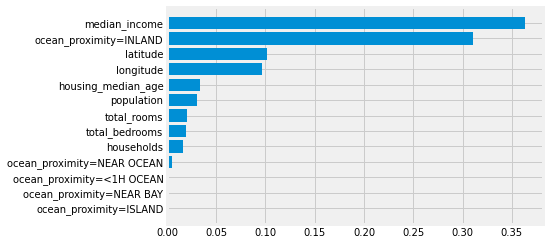

In [19]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

* What's the most important feature?

### **Answer: median_income**

Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

* Install XGBoost.
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:



In [20]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import xgboost as xgb

In [22]:
# Create the DMatrix 
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [23]:
watchlist =[(dtrain,'train'),(dval,'val')]

In [24]:
%%capture output

xgb_params = {  
    'eta': 0.3,  
    'max_depth': 6,  
    'min_child_weight': 1,  

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,num_boost_round=100,verbose_eval=1,
                  evals=watchlist)
y_pred = model.predict(dval)


In [25]:
rmse = mean_squared_error(y_pred,y_val)**0.5
print(rmse)

0.2260957847928297


### Now, change eta first to 0.1 and then to 0.01.



In [26]:
%%capture output

xgb_params = {  
    'eta': 0.1,  
    'max_depth': 6,  
    'min_child_weight': 1,  

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,num_boost_round=100,verbose_eval=1,
                  evals=watchlist)
y_pred = model.predict(dval)

rmse = mean_squared_error(y_pred,y_val)**0.5


In [27]:
rmse

0.2305416021993131

In [28]:
%%capture output

xgb_params = {  
    'eta': 0.01,  
    'max_depth': 6,  
    'min_child_weight': 1,  

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,num_boost_round=100,verbose_eval=1,
                  evals=watchlist)
y_pred = model.predict(dval)

rmse = mean_squared_error(y_pred,y_val)**0.5


In [29]:
rmse

4.264961152048471

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give the same

### **Answer: 0.1**